https://medium.com/@manivannan_data/how-to-train-ner-with-custom-training-data-using-spacy-188e0e508c6

In [1]:
import pandas as pd
import spacy
import json
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_to_file = "../data/labeled_data_1000rows.csv"
path_to_old_file = "../data/scrpaing_result_raw.csv"

In [3]:
df = pd.read_csv(path_to_file, encoding='utf8', sep='|', nrows=628, header=1, names=['text', 'entities'])
df.astype('string')
df = df.fillna('')
df['entities'] = df['entities'].replace('restaurants', '')

In [4]:
df.head()

,text,entities
0,I will update it periodically as I discover ne...,
1,"It is by no means exhaustive, these are places...",
2,"restaurant details: website , IG I finally mad...",Haut Brion
3,"His cuisine is one of modernity, subtlety and ...",
4,Decidedly French with flourishes…,


In [5]:
df['number_of_entities'] = df['entities'].apply(lambda x: x.count(',') + 1 if x != '' else 0)

In [6]:
df.groupby(['number_of_entities']).count()

,text,entities
number_of_entities,,
0,547,547
1,70,70
2,9,9
3,1,1
5,1,1


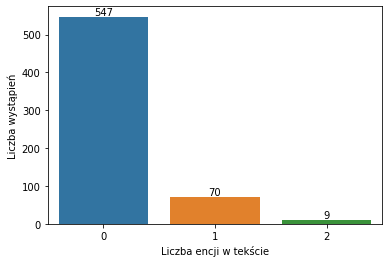

In [17]:
df2 = df.groupby(['number_of_entities']).count()
df2.columns = ['Liczba encji w wierszu', 'Text', 'Liczba wierszy']
df2
sns.barplot(x='Liczba wierszy', y='Liczba encji w wierszu')

sns_plot = sns.barplot(x='Liczba encji w tekście', y='Liczba wystąpień', data=df3)
# sns_plot.set(yscale="log")

fig = sns_plot.get_figure()
fig.savefig("../plots/dataset_histo.pdf") 